##  KNN
K Near Neighbors

Si tengo los siguientes 3 puntos con sus repectivas etiquetas.
X = [[4,5],[3,5],[3,4.4]], y = [4, 4.5, 4.3]

Y deseo predecir un nuevo dato.

$X_{new}$ = [3, 3] , y=?

## Distancias

Podemos utilizar cualquier tipo de distancia. Norma_1 tambien es conocida como Manhattan distance.

${N_1 = |X_{0,0} - X_{1,0}|_1^1+ |X_{1,1} - X_{1,1}|_1^1}$

Norma_2, es la distancia euclidiana.

${N_2 = \sqrt{(X_{0,0} - X_{1,0})^2 + (X_{1,1} - X_{1,1})^2}}$

## K es el numero de vecinos
K es el numero de vecinos que se consideran en la prediccion.

Si es regresion: Osea que el valor a predecir es un valor continuo
### K es 1
para K=1
Para nuestro ejemplo cuando llega el nuevo dato [3, 3].


$y^* = y_i, i,{argmin(||D||)}$

Las distancias del nuevo dato al punto 1 es [ 3], al punto 2 es [ 2] y al punto 3 [1.4]. Por lo que el valor a 

retornar es 4.3. Que es el indice 3 del vector y.

### K es 2
$y^* = {1\over2}{{\sum}_{i=1}^{k=2}{Y_i, args(sorted(||D||)) }}$

Cuando K=2 el valor a retornar es el promedio del valor de *y* para los puntos 2 y 3.

El resultado es 4.4

### K es cualquier valor

$y^* = {{1}\over{K}}{{\sum}_{i=1}^{k=K}{Y_i, args(sorted(||D||)) }}$


In [38]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [23]:
class KNN:
    def __init__(self, K):
        self.K = K
    
    def train(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X_new):
        n = len(X)
        dis = []
        i = 0
        for rows in X:
            measure_dis = 0
            for j in range(len(rows)):
                measure_dis += abs(rows[j] - X_new[j]) 
            dis.append((measure_dis,i))
            i = i + 1
        dis = sorted(dis, key=lambda dis: dis[0])
        y_hat =  np.mean([y[elm_d[1]] for elm_d in dis[:self.K]])
        
        return y_hat

In [68]:
K = 2
knn = KNN(K)
X = [[4,5],[3,5],[3,4.4]]
y = [4, 4.5, 4.3]
knn.train(X,y)
new_dato =  [3, 3]
y_hat = knn.predict(new_dato)
print("La predictioncon K={0}, es y_hat={1}".format(K,y_hat))

[(1.4000000000000004, 2), (2, 1), (3, 0)] [4.3, 4.5]
La predictioncon K=2, es y_hat=4.4


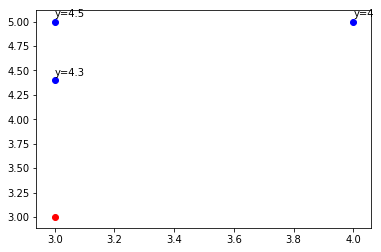

In [88]:
fig, ax = plt.subplots()
marg = 0.05
ax.scatter(np.array(X)[:,0], np.array(X)[:,1],c='b')
for row,y_text in zip(np.array(X),y):
    ax.text(row[0], row[1]+marg, "y=%s"%y_text)
ax.scatter(new_dato[0],new_dato[1],c='r')
plt.show()